In [2]:
# 한국어 토크나이저 다운로드를 위한 코드
!pip install -U pip
!pip install -q konlpy

# 군집화를 위한 sentence-transformer 를 위해 다운로드 
!pip install -U sentence-transformers
# 한국어 토크나이저중 mecab 사용을 위해 다운로드 
!pip install -q python-mecab-ko

# sparse-topn을 사용하기 위한 코드임 
!pip install -q /kaggle/input/sparse-dot-topn-033/sparse_dot_topn-0.3.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 3.3 MB/s eta 0:00:00 0:00:01


In [3]:
# Pretrained Tokenizer mecab 은 세팅 
from mecab import MeCab

mecab = MeCab()

def tokenizer_mecab(text):
    return mecab.morphs(text)

In [4]:
import random
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

korean_essay = pd.read_csv('/kaggle/input/korean-essay/korean_essay.csv')[:501]
real_test_df = pd.read_csv('/kaggle/input/llm-detection-result/1600_train_mistral_7B.csv')
display(real_test_df.head())
display(korean_essay.head())
print('실제 논술 데이터 : ',len(real_test_df))
print('korean essay : ', len(korean_essay))

/tmp/ipykernel_33/3982287846.py:6: DtypeWarning: Columns (0,1,2,3,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  korean_essay = pd.read_csv('/kaggle/input/korean-essay/korean_essay.csv')[:501]


,text,label,id,generated
0,"제시문 가는 역사적으로 새로운 종교를 창설하려는 시도가 실패로 끝났음에도 불구하고,...",1,1,0.999220
1,제시문 가2에서는 돈 키호테와 산초의 대화를 통해 현실과 환상 사이의 갈등이 나타나...,1,2,0.999503
2,"주제어로 선택된 공통 키워드는 ""아름다움""입니다.\n\n제시문 가에서는 매화의 아름...",1,3,0.999230
3,네 제시문들의 순서를 정하기 위해서는 각 제시문이 개인과 사회 간 영향을 어떻게 다...,1,4,0.992640
4,네 제시문들에는 현대 사회에서의 갈등 상황에 대한 다양한 해법과 접근 방식이 내포되...,1,5,0.999798


,ID,model,대학,제시문,중간,문제,공백,생성 Text,비고
0,NaN,GPT-3.5,2012학년도 연세대학교 논술(사회계열) 입학시험 문제,제시문 (가)\n새로운 종교를 창설하려는 여러 번의 시도가 실패로 끝난 것은 상당히...,\n,한 사회에 새로움이 부상하는 과정에서 다수가 수행하는 역할을 중심으로 제시문 (가)...,,\n제시문 (가)는 역사적으로 새로운 종교를 창설하려는 시도가 실패로 끝났음에도 불...,NaN
1,NaN,GPT-3.5,2013학년도 연세대학교 논술(사회계열) 입학시험 문제,(가)\n가-1. \n기원전 4세기경 그리스 철학자 데모스테네스는 “자기를 속이는 ...,\n,"제시문 (가-2)를 바탕으로 제시문 (나)와 (다)를 비교 분석하시오. (1,000...",,제시문 가-2에서는 돈 키호테와 산초의 대화를 통해 현실과 환상 사이의 갈등이 나타...,NaN
2,NaN,GPT-3.5,2013학년도 연세대학교 논술(인문계열) 입학시험 문제,"제시문 (가)\n강녕의 용반, 소주의 등위, 항주의 서계는 모두 매화 산지이다.\n...",\n,"제시문 (가), (나), (다)에 공통된 주제어를 찾고, 이를 바탕으로 제시문 (가...",,"주제어로 선택된 공통 키워드는 ""아름다움""입니다.\n\n제시문 (가)에서는 매화의 ...",NaN
3,NaN,GPT-3.5,2014학년도 연세대학교 수시모집 논술 (사회계열) 입학시험 문제지,제시문 (가)\n개인에 있어서의 합리적인 선택 원칙을 사회 전체에 적용할 수 있으려...,\n,개인과 사회는 서로 영향을 미칠 수 있다. 개인이 사회에 영향을 미치는 정도가 높은...,,네 제시문들의 순서를 정하기 위해서는 각 제시문이 개인과 사회 간 영향을 어떻게 다...,NaN
4,NaN,GPT-3.5,2014학년도 연세대학교 수시모집 논술 (사회계열) 입학시험 문제지,제시문 (가)\n개인에 있어서의 합리적인 선택 원칙을 사회 전체에 적용할 수 있으려...,\n,현대 사회에서는 구성원 상호간에 서로 상충된 요구와 주장들이 늘어나고 있다. 이와 ...,,네 제시문들에는 현대 사회에서의 갈등 상황에 대한 다양한 해법과 접근 방식이 내포되...,NaN


실제 논술 데이터 :  501
korean essay :  501


In [6]:
real_test_df = real_test_df.rename(columns={'text': '생성 Text'})
real_test_df.sample(10)

,생성 Text,label,id,generated
436,"제시문 다의 내용은 단순하고 자급자족하는 농업 생활을 이상적으로 제시하며, 현대 사...",1,437,0.999254
129,라를 보면 2011년 초부터 2020년 말까지 국가A가 국가B보다 응용기술에 더 많...,1,130,0.040927
242,제시문 가의 아이히만과 나의 시적 화자는 각각 역사적 실존 인물과 시적 상상력을 통...,1,243,0.999619
37,예로부터 인간은 자아 이외의 객관적 세계를 자신의 직관으로 판단하는 솔립시즘적 경향...,0,38,0.011411
438,"제시문 다의 요약:Dr. Burke의 연구에 따르면, 청소년들은 나이가 들면서 감정...",1,439,0.907736
265,"제시문 가에서의 옥이가 겪는 크리스마스는 제시문 다의 관점에서 볼 때, 서구 추수주...",1,266,0.988320
256,제시문 1에서 다루어진 정통과 이단에 대한 사회적 인식의 유동성은 사회적 가치관의 ...,1,257,0.999924
128,"라의 표에서는 국가A가 국가B보다 응용기술에 더 많은 예산을 지원하고, 국가B가 국...",0,129,0.600537
79,인간의 행동과 판단은 무엇에 기반하고 있을까? 이에 대한 논쟁은 오랫동안 이어져왔다...,1,80,0.999964
85,개인의 자유를 제한하는 것은 사회를 규율하는 질서와 원리를 의도적으로 설계하는 것으...,1,86,0.999554


In [7]:
real_test_df = real_test_df[['생성 Text','label','generated']]
real_test_df = real_test_df[:501]
real_test_df.sample(10)

,생성 Text,label,generated
330,"The Help""는 Kathryn Stockett이 쓴 소설로, 1964년 시민권법...",1,0.998611
180,가는 늘어나는 지구의 온실가스 농도에 대응하여 기후 변화 협약에 따라 온실 가스 감...,0,0.118282
88,"제시문 1, 2, 그리고 3은 각각 다른 시대와 지역에서 발생한 사회적 현상에 대해...",1,0.986988
220,제시문 라는 레비나스의 관점을 소개하고 있습니다. 여기서 레비나스는 다른 사람에 대...,1,0.998648
108,제시문 자에서는 개인의 행동과 자아 정체성이 사회 집단으로부터 영향을 받는다는 것을...,1,0.999937
10,가에서는 인간 복제 기술의 도래로 인한 윤리적 문제와 사회적 논란을 다루고 있습니다...,1,0.998459
216,제시문 라에서 레비나스의 철학적 관점은 타자에 대한 무한한 책임감을 강조한다. 이는...,1,0.999963
308,제시문 가는 풍자의 본질을 비판 정신과 유희 정신의 결합으로 정의한다. 이를 바탕으...,1,0.998366
65,"나에서는 내집단과 외집단 간의 경계가 형성되고, 내집단에 대한 강한 정체감이 외집단...",1,0.999662
489,분석: 자료 4에서 어머니는 질문자의 정체를 알 수 없는 상태에서 대답을 강요받습니...,1,0.999597


In [8]:
real_test_df.tail(10)

,생성 Text,label,generated
491,제시문 에서 놀부의 결정은 경제적 효율성과 자립을 중시하는 입장에서 일정 부분 타당...,1,0.999793
492,"제시문은 텔레비전 프로그램의 국제 유통에서 경제적, 정치적, 문화적 요인이 중요한 ...",1,0.993326
493,「난타」와 「명성황후」는 한국 문화의 세계화를 다루는 두 가지 사례입니다. 「난타」...,1,0.997896
494,자유와 평등의 조화가 실현된 자유민주주의 사회를 이루기 위해 제시문에서는 상호간의 ...,1,0.992797
495,제시문에서 '표현의 자유'는 인간의 이성을 기반으로 한 자유롭고 공개된 의견 교환을...,1,0.991108
496,"오이디푸스의 결단은 제시문에서 제시된 개인과 공동체의 관계 관점 중 ③번, 즉 ""개...",1,0.998781
497,가 요약: 제시문 가에서는 헤라클레이토스와 크리틸루스의 견해를 통해 시간을 흐르는 ...,1,0.925679
498,"다 요약: 제시문 다는 ""오늘""에 초점을 맞추고 있으며, 지나간 과거나 오지 않은 ...",1,0.995227
499,제시문 마와 바 요약: 제시문 마는 정확한 시간 측정의 필요성이 해양 항해에서 경도...,1,0.997191
500,가부터 바까지 제시된 다양한 시간의 개념과 삶에 대한 태도는 서로 다른 문화와 사회...,1,0.998714


In [9]:
import argparse
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sparse_dot_topn import awesome_cossim_topn


class TextMatcher:
    def __init__(self, ground_truth, col, topk=5, lower_bound=-1):
        self.ground_truth = ground_truth
        self.vec = TfidfVectorizer(ngram_range=(1, 2), analyzer="word",tokenizer=tokenizer_mecab,
                                   use_idf=False, min_df=2, binary=True)
        self.topk = topk
        self.lower_bound = lower_bound
        self.col = col
        
    def get_matches_df(self, sparse_matrix, texts):
        non_zeros = sparse_matrix.nonzero()

        text_indices = non_zeros[0]
        gt_indices = non_zeros[1]

        left_side = np.empty(gt_indices.size, dtype=object)
        right_side = np.empty(gt_indices.size, dtype=object)
        match_score = np.zeros(gt_indices.size)

        for index in range(gt_indices.size):
            left_side[index] = texts.values[text_indices[index]]
            right_side[index] = self.ground_truth[self.col].values[gt_indices[index]]
            match_score[index] = sparse_matrix.data[index]

        res_df = pd.DataFrame({self.col: left_side,
                               'Ground Truth': right_side,
                               'match_score': match_score})

        res_df = pd.DataFrame(texts).merge(res_df, on=self.col, how="left")
        return res_df


    def match(self, texts_to_match, n_threads=16):
        print(f"Matching {texts_to_match.shape[0]} texts to {self.ground_truth.shape[0]} texts...")
        
        X = self.vec.fit_transform(texts_to_match[self.col])
        X_gt = self.vec.transform(self.ground_truth[self.col])
        
        sparse_sim = awesome_cossim_topn(X, X_gt.T, self.topk, self.lower_bound, use_threads=True, n_jobs=n_threads)
        
        return self.get_matches_df(sparse_sim, texts_to_match[self.col])

In [10]:
#---------------------------------------------------------------------------------------------------------#

# E: Ahmet's Approach
# !python run_ahmet_approach.py \
# --score_path ./outputs/m0.parquet \
# --save_dir "./outputs" \
# --model_id "m5"

#---------------------------------------------------------------------------------------------------------#

# 우리가 볼 df -> test_df
df = real_test_df.copy()
df['prompt_id'] = 0
df['id'] = [ i for i in range(len(df))]
all_prompts = df["prompt_id"].unique()
df = df.rename(columns={'생성 Text': 'text'})
 
# HUMAN_TH = 0.1
# LLM_TH = 0.99

HUMAN_TH = 0.1
LLM_TH = 0.9

MIN_N = min(64, len(df))

df_list = []

for pid in all_prompts:
    
    # prompt id 현재 pid 인 값만 가져오기
    cdf = df[df['prompt_id']==pid].copy() 
    
    # 위에서부터 generated 값 낮은것부터 정렬해서 가져옴
    cdf = cdf.sort_values(by='generated').reset_index(drop=True)
    
    # 0.1 보다 낮거나 같으면 인간이 생성한거임 
    cdf["likely_student"] = cdf["generated"].apply(lambda x: x<=HUMAN_TH)
    
    # 0.99보다 같거나 크면 llm 이 생성한 거임 
    cdf["likely_llm"] = cdf["generated"].apply(lambda x: x>=LLM_TH)
    
    # likely_student 의 전체합이 Min_N 보다 작으면 MIN_N 행까지 likely_Student 값을 True 로 만든다.
    if cdf["likely_student"].sum() < MIN_N:
        cdf.loc[:MIN_N, "likely_student"] = True
    
    # likely llm 전체 합 값이 MIN_M보다 작으면 뒤에서부터 MIN_N까지의 likley llm 값을 True로 만든다. 
    if cdf["likely_llm"].sum() < MIN_N:
        cdf.loc[cdf.shape[0] - MIN_N:, "likely_llm"] = True
        
    display(cdf.head())
    display(cdf.tail())
    print("=="*40)
    df_list.append(cdf)

# 다합치고 generated 확률값없애는 거임 
df = pd.concat(df_list).reset_index(drop=True)
df = df.drop(columns=['generated'])

,text,label,generated,prompt_id,id,likely_student,likely_llm
0,지문 가는 개인의 양심이나 사회적 정의에 따라 국가의 법에 반하여 불복종할 권리와 ...,0,0.001701,0,32,True,False
1,제시문가는 인간복제에 대해 윤리적 입장의 고려를 중시한다. 1997년 복제양 돌리의...,0,0.001828,0,12,True,False
2,2 ‘ ’ . 제시문 마 의 붉은 여왕의 나라 는 두 가지 의미를 가지고 있다 ...,0,0.002111,0,286,True,False
3,기능론적 관점에 의하면 사회에서는 사회의 유지와 발전에 도움이 되는 역할에 대해서 ...,0,0.003180,0,311,True,False
4,"가 제시문은 생명 복제 기술의 문제점에 대하여 논하고 있다. 인간의 고유성, 복제 ...",0,0.006501,0,11,True,False


,text,label,generated,prompt_id,id,likely_student,likely_llm
496,"제시문 아에 따르면, 세대 갈등이 심화되는 원인은 개인의 경험과 배경이 다르기 때문...",1,0.999989,0,342,False,True
497,"제시문 가, 나, 다에서는 글쓰기와 지식 발전 간의 관계에 대한 서로 다른 관점이 ...",1,0.999990,0,244,False,True
498,"제시문 1과 2는 사회 구성원의 자유와 이를 제한하는 사회적, 정부적 개입에 대한 ...",1,0.999990,0,255,False,True
499,우리 사회는 자유와 질서 사이의 균형을 찾아야 하는 어려운 과제에 직면해 있다. 좀...,1,0.999991,0,253,False,True
500,"김춘수의 시 ""꽃""에서 시작된 '이름 부르기'의 행위는 그저 무의미한 존재에게 의미...",1,0.999995,0,276,False,True


In [11]:
#---------------------------------------------------------------------------------------------------------#
# MATCHING
#---------------------------------------------------------------------------------------------------------#

# 최소 64 개의 코사인 유사도를 구할거임 
TOPK = min(64, len(df))


# 인자로 score 배열 가져옴
def agg_fn(scores, margin=0.5):
    
    # 스코어 배열중 최대값 가져옴
    max_score = max(scores)
    
    #  margin 이 0.5 일시 최대값의 절반값이 된다. -> 이를 기준치라고 하자
    th = (1.0 - margin) * max_score
    
    # 기준치보다 큰수만 남긴다 이를 kept_scores 라고 한다. 
    kept_scores = [s for s in scores if s >= th]
    
    # 남겨진 수들의 평균값을 ret 라고 한다. 
    ret = np.mean(kept_scores)
    return ret

def get_match_score(df, gt_filter_col):
    # df[df[gt_filter_col]] 랑 df 는 명백히 다른거임 
    # df 는 전체데이터 즉, prompt_id 기준으로 걸러진거고 
    # df[df[gt_filter_col]] 은 llm,student 들이 잘 해결한거임 
    tm = TextMatcher(df[df[gt_filter_col]].reset_index(drop=True), "text", topk=TOPK)
    
    res_df = tm.match(df, n_threads=4)
    
    # match_score 에서 살짝 변형 시켜주고 text 기준으로 옆으로 이어붙임 
    df = res_df.groupby("text")["match_score"].agg(agg_fn).reset_index().merge(df, on="text")
    return df


sub_dfs = [get_match_score(df[df["prompt_id"] == pid], "likely_student").reset_index(drop=True)[["id", "match_score"]]
           for pid in all_prompts] # TODO: may cause exception?
sub_df = pd.concat(sub_dfs).rename(columns={"match_score": "match_score_student"})


sub_dfs = [get_match_score(df[df["prompt_id"] == pid], "likely_llm").reset_index(drop=True)[["id", "match_score"]]
           for pid in all_prompts]
sub_df2 = pd.concat(sub_dfs).rename(columns={"match_score": "match_score_llm"})

sub_df = sub_df.merge(sub_df2, on="id")

SMOOTH = 0.15

sub_df["new generated"] = -sub_df["match_score_student"] / (sub_df["match_score_llm"] + SMOOTH)
sub_df.head()
# sub_df = sub_df[["id", "generated"]].copy()

# sub_df.to_excel('output_1.xlsx',index=False)

Matching 501 texts to 65 texts...


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Matching 501 texts to 371 texts...


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,id,match_score_student,match_score_llm,new generated
0,285,1.000000,0.206157,-2.807751
1,294,0.187657,0.200771,-0.534985
2,232,1.000000,0.223432,-2.677861
3,363,0.155835,1.000000,-0.135509
4,176,0.161553,1.000000,-0.140481


In [12]:
display(sub_df.head())
display(real_test_df.head())

,id,match_score_student,match_score_llm,new generated
0,285,1.000000,0.206157,-2.807751
1,294,0.187657,0.200771,-0.534985
2,232,1.000000,0.223432,-2.677861
3,363,0.155835,1.000000,-0.135509
4,176,0.161553,1.000000,-0.140481


,생성 Text,label,generated
0,"제시문 가는 역사적으로 새로운 종교를 창설하려는 시도가 실패로 끝났음에도 불구하고,...",1,0.999220
1,제시문 가2에서는 돈 키호테와 산초의 대화를 통해 현실과 환상 사이의 갈등이 나타나...,1,0.999503
2,"주제어로 선택된 공통 키워드는 ""아름다움""입니다.\n\n제시문 가에서는 매화의 아름...",1,0.999230
3,네 제시문들의 순서를 정하기 위해서는 각 제시문이 개인과 사회 간 영향을 어떻게 다...,1,0.992640
4,네 제시문들에는 현대 사회에서의 갈등 상황에 대한 다양한 해법과 접근 방식이 내포되...,1,0.999798


In [13]:
# 예시: id 열을 기준으로 두 데이터프레임을 결합합니다.
merged_df = pd.merge(sub_df, df, on="id", how="inner")
display(merged_df.head(20))

,id,match_score_student,match_score_llm,new generated,text,label,prompt_id,likely_student,likely_llm
0,285,1.000000,0.206157,-2.807751,"1 ‘ ’ , ‘ ’ ‘ ’ 제시문 가 의 더불어 혼자 사는 삶에서 더불어 ...",0,0,True,False
1,294,0.187657,0.200771,-0.534985,1 제시문 가와 나의 ‘나吾’와 ‘아我’는 모두 ‘세계 만물과 나吾’ 또는 ‘비아와...,0,0,False,False
2,232,1.000000,0.223432,-2.677861,1 제시문가와 제시문나는 올바른좋은 독서에 대해 서로 다른 관점을 가지고 있다. 제...,0,0,True,False
3,363,0.155835,1.000000,-0.135509,18세기 조선의 새로운 학문적 경향은 시대적 변화와 사회적 요구에 부응하기 위한 노...,1,0,False,True
4,176,0.161553,1.000000,-0.140481,18세기 조선의 새로운 학문적 경향은 시대적 변화와 사회적 요구에 부응하기 위한 노...,1,0,False,True
5,89,0.170121,1.000000,-0.147931,1의 가에서는 한 남자가 돈을 벌기 위해 매품을 팔아 살아가던 이야기를 듣습니다. ...,1,0,False,True
6,286,1.000000,0.209061,-2.785041,2 ‘ ’ . 제시문 마 의 붉은 여왕의 나라 는 두 가지 의미를 가지고 있다 ...,0,0,True,False
7,295,1.000000,0.184137,-2.992783,"2 가의 저자의 관점에서 보면, 윤 직원 영감의 말과 행동은 겉으로 보기에 윤 직원...",0,0,True,False
8,233,1.000000,0.217770,-2.719093,2 제시문 가에서는 책의 가치를 과소평가하거나 과대평가하지 않고 온전히 집중된 상태...,0,0,True,False
9,275,0.175622,1.000000,-0.152715,997년 복제 양 돌리의 탄생은 인류에게 큰 충격과 동시에 깊은 성찰의 기회를 제공...,1,0,False,True


In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

min_val = min(merged_df['new generated'])
max_val = max(merged_df['new generated'])

# Min-Max 스케일링 함수 정의
def min_max_scaling(x):
    return (x - min_val) / (max_val - min_val)

merged_df['real_generated']= merged_df['new generated'].apply(min_max_scaling)
# 변환된 결과 확인
display(merged_df.head(20))

,id,match_score_student,match_score_llm,new generated,text,label,prompt_id,likely_student,likely_llm,real_generated
0,285,1.000000,0.206157,-2.807751,"1 ‘ ’ , ‘ ’ ‘ ’ 제시문 가 의 더불어 혼자 사는 삶에서 더불어 ...",0,0,True,False,0.095606
1,294,0.187657,0.200771,-0.534985,1 제시문 가와 나의 ‘나吾’와 ‘아我’는 모두 ‘세계 만물과 나吾’ 또는 ‘비아와...,0,0,False,False,0.856754
2,232,1.000000,0.223432,-2.677861,1 제시문가와 제시문나는 올바른좋은 독서에 대해 서로 다른 관점을 가지고 있다. 제...,0,0,True,False,0.139106
3,363,0.155835,1.000000,-0.135509,18세기 조선의 새로운 학문적 경향은 시대적 변화와 사회적 요구에 부응하기 위한 노...,1,0,False,True,0.990539
4,176,0.161553,1.000000,-0.140481,18세기 조선의 새로운 학문적 경향은 시대적 변화와 사회적 요구에 부응하기 위한 노...,1,0,False,True,0.988874
5,89,0.170121,1.000000,-0.147931,1의 가에서는 한 남자가 돈을 벌기 위해 매품을 팔아 살아가던 이야기를 듣습니다. ...,1,0,False,True,0.986378
6,286,1.000000,0.209061,-2.785041,2 ‘ ’ . 제시문 마 의 붉은 여왕의 나라 는 두 가지 의미를 가지고 있다 ...,0,0,True,False,0.103211
7,295,1.000000,0.184137,-2.992783,"2 가의 저자의 관점에서 보면, 윤 직원 영감의 말과 행동은 겉으로 보기에 윤 직원...",0,0,True,False,0.033639
8,233,1.000000,0.217770,-2.719093,2 제시문 가에서는 책의 가치를 과소평가하거나 과대평가하지 않고 온전히 집중된 상태...,0,0,True,False,0.125297
9,275,0.175622,1.000000,-0.152715,997년 복제 양 돌리의 탄생은 인류에게 큰 충격과 동시에 깊은 성찰의 기회를 제공...,1,0,False,True,0.984776


ROC-AUC 면적: 0.9596825396825396


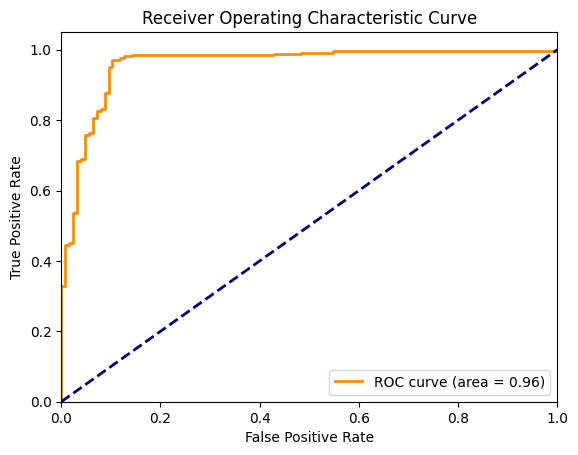

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 실제 라벨
y_true = merged_df['label'].values

# ROC 곡선 그리기
fpr, tpr, thresholds = roc_curve(y_true, merged_df['real_generated'])
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")

# ROC-AUC 면적 출력
print("ROC-AUC 면적:", roc_auc)

plt.show()

In [17]:
from sklearn.metrics import f1_score

# F1 스코어 계산
y_pred = [1 if score > 0.5 else 0 for score in merged_df['real_generated']]  # fixed_results는 모델 예측 결과로 가정
f1 = f1_score(y_true,  y_pred)

# F1 스코어 출력
print("F1 Score:", f1)

F1 Score: 0.9149198520345253
